# Problem Statement

A plastics manufacturing plant has recorded their monthly sales data from 1949 to 1953. Perform forecasting on the data and bring out insights from it and forecast the sale for the next year. 

Lets load our data and important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (10,12)

In [2]:
data = pd.read_csv('PlasticSales.csv')
data.shape

(60, 2)

We have 60 rows and 2 columns

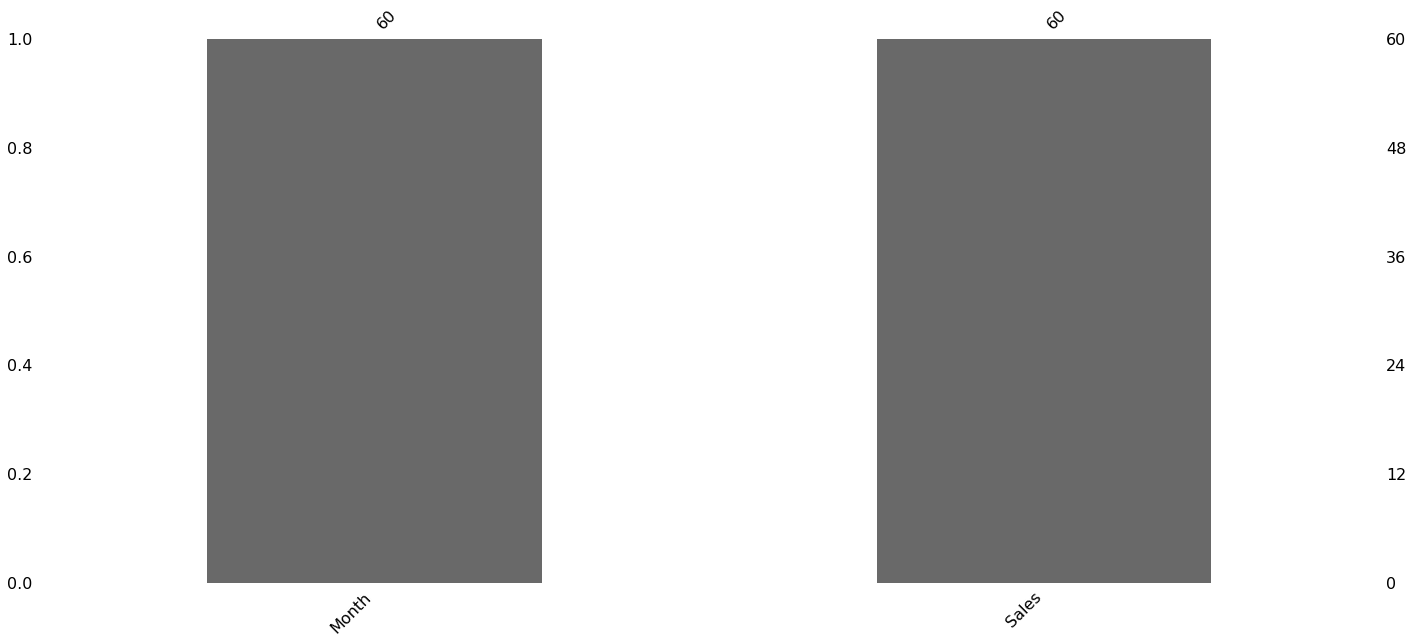

In [3]:
msno.bar(data)

No missing value in our data

Lets explore our dataset

In [4]:
backup = data.copy()

In [5]:
data.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [7]:
data.tail()

,Month,Sales
55,Aug-53,1608
56,Sep-53,1528
57,Oct-53,1420
58,Nov-53,1119
59,Dec-53,1013


In [17]:
data['Dates'] = pd.to_datetime(data['Month'])
data

,Month,Sales,Dates
0,Jan-49,742,2049-01-01
1,Feb-49,697,2049-02-01
2,Mar-49,776,2049-03-01
3,Apr-49,898,2049-04-01
4,May-49,1030,2049-05-01
5,Jun-49,1107,2049-06-01
6,Jul-49,1165,2049-07-01
7,Aug-49,1216,2049-08-01
8,Sep-49,1208,2049-09-01
9,Oct-49,1131,2049-10-01


In [18]:
data['Dates'] = np.where(data['Dates'].dt.year > 2000, data['Dates'] - pd.offsets.DateOffset(years=100),data['Dates'])
data

,Month,Sales,Dates
0,Jan-49,742,1949-01-01
1,Feb-49,697,1949-02-01
2,Mar-49,776,1949-03-01
3,Apr-49,898,1949-04-01
4,May-49,1030,1949-05-01
5,Jun-49,1107,1949-06-01
6,Jul-49,1165,1949-07-01
7,Aug-49,1216,1949-08-01
8,Sep-49,1208,1949-09-01
9,Oct-49,1131,1949-10-01


In [19]:
# converting the dates columns into proper date time format

dates = pd.date_range(start='1949-01-01', freq='MS',periods=len(data))
dates

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01', '1949-11-01', '1949-12-01',
               '1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01', '1950-11-01', '1950-12-01',
               '1951-01-01', '1951-02-01', '1951-03-01', '1951-04-01',
               '1951-05-01', '1951-06-01', '1951-07-01', '1951-08-01',
               '1951-09-01', '1951-10-01', '1951-11-01', '1951-12-01',
               '1952-01-01', '1952-02-01', '1952-03-01', '1952-04-01',
               '1952-05-01', '1952-06-01', '1952-07-01', '1952-08-01',
               '1952-09-01', '1952-10-01', '1952-11-01', '1952-12-01',
               '1953-01-01', '1953-02-01', '1953-03-01', '1953-04-01',
               '1953-05-01', '1953-06-01', '1953-07-01', '1953-08-01',
      

In [20]:
data['Month'] = dates.month
data['Year'] = dates.year
data.head()

,Month,Sales,Dates,Year
0,1,742,1949-01-01,1949
1,2,697,1949-02-01,1949
2,3,776,1949-03-01,1949
3,4,898,1949-04-01,1949
4,5,1030,1949-05-01,1949


In [21]:
# lets get the name of our months
import calendar
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data = data[['Month','Year','Dates','Sales']]
data.head()

,Month,Year,Dates,Sales
0,Jan,1949,1949-01-01,742
1,Feb,1949,1949-02-01,697
2,Mar,1949,1949-03-01,776
3,Apr,1949,1949-04-01,898
4,May,1949,1949-05-01,1030


In [22]:
# Lets add the dates to our data set

data.set_index('Dates', inplace=True)
data

,Month,Year,Sales
Dates,,,
1949-01-01,Jan,1949,742
1949-02-01,Feb,1949,697
1949-03-01,Mar,1949,776
1949-04-01,Apr,1949,898
1949-05-01,May,1949,1030
1949-06-01,Jun,1949,1107
1949-07-01,Jul,1949,1165
1949-08-01,Aug,1949,1216
1949-09-01,Sep,1949,1208


Lets visualize our data

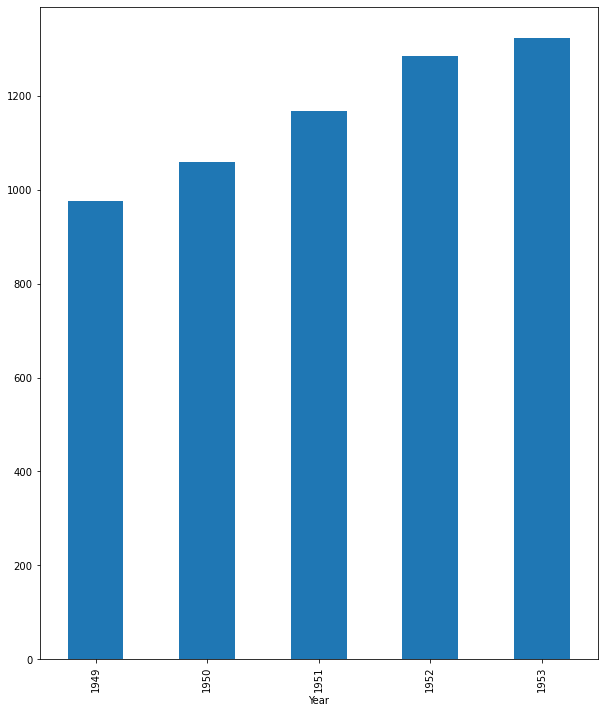

In [24]:
data.groupby('Year')['Sales'].mean().plot(kind='bar')

We see there is an upward trend in sales number YoY

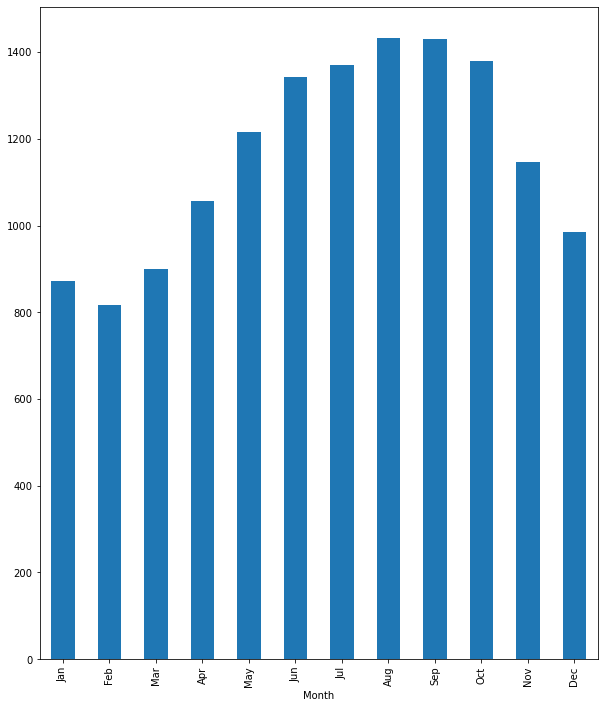

In [23]:
data.groupby('Month')['Sales'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')

Peak season is from June to Oct

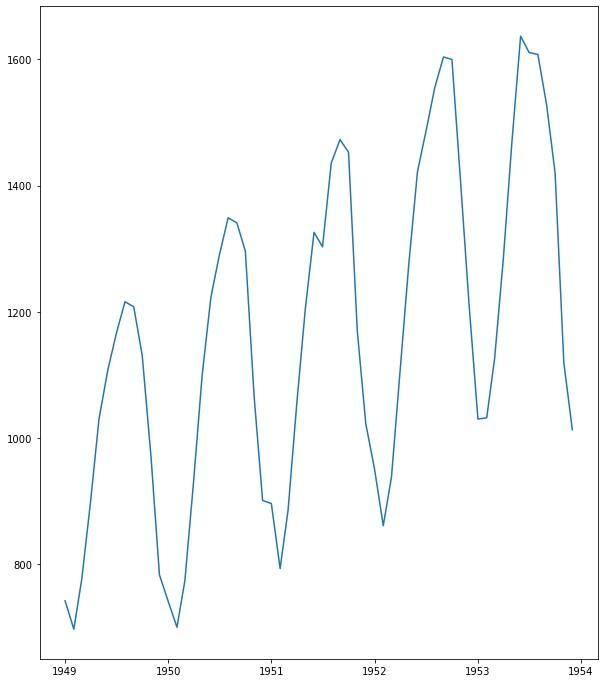

In [25]:
plt.plot(data['Sales'])

Decomposition Chart

In [26]:
sales_count = data['Sales']
sales_count

Dates
1949-01-01     742
1949-02-01     697
1949-03-01     776
1949-04-01     898
1949-05-01    1030
1949-06-01    1107
1949-07-01    1165
1949-08-01    1216
1949-09-01    1208
1949-10-01    1131
1949-11-01     971
1949-12-01     783
1950-01-01     741
1950-02-01     700
1950-03-01     774
1950-04-01     932
1950-05-01    1099
1950-06-01    1223
1950-07-01    1290
1950-08-01    1349
1950-09-01    1341
1950-10-01    1296
1950-11-01    1066
1950-12-01     901
1951-01-01     896
1951-02-01     793
1951-03-01     885
1951-04-01    1055
1951-05-01    1204
1951-06-01    1326
1951-07-01    1303
1951-08-01    1436
1951-09-01    1473
1951-10-01    1453
1951-11-01    1170
1951-12-01    1023
1952-01-01     951
1952-02-01     861
1952-03-01     938
1952-04-01    1109
1952-05-01    1274
1952-06-01    1422
1952-07-01    1486
1952-08-01    1555
1952-09-01    1604
1952-10-01    1600
1952-11-01    1403
1952-12-01    1209
1953-01-01    1030
1953-02-01    1032
1953-03-01    1126
1953-04-01    1285
1953-0

With Multiplicative Model

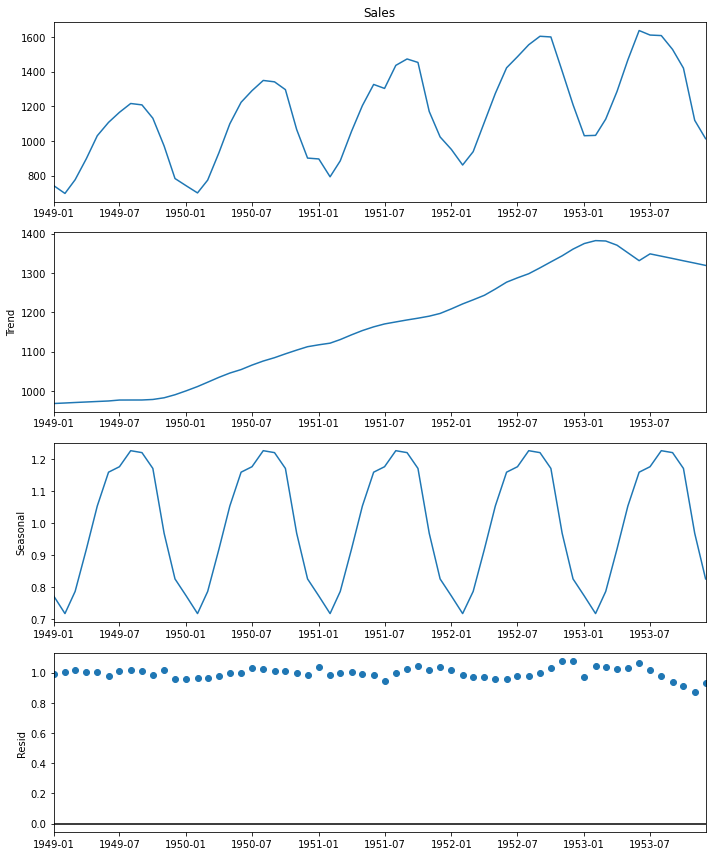

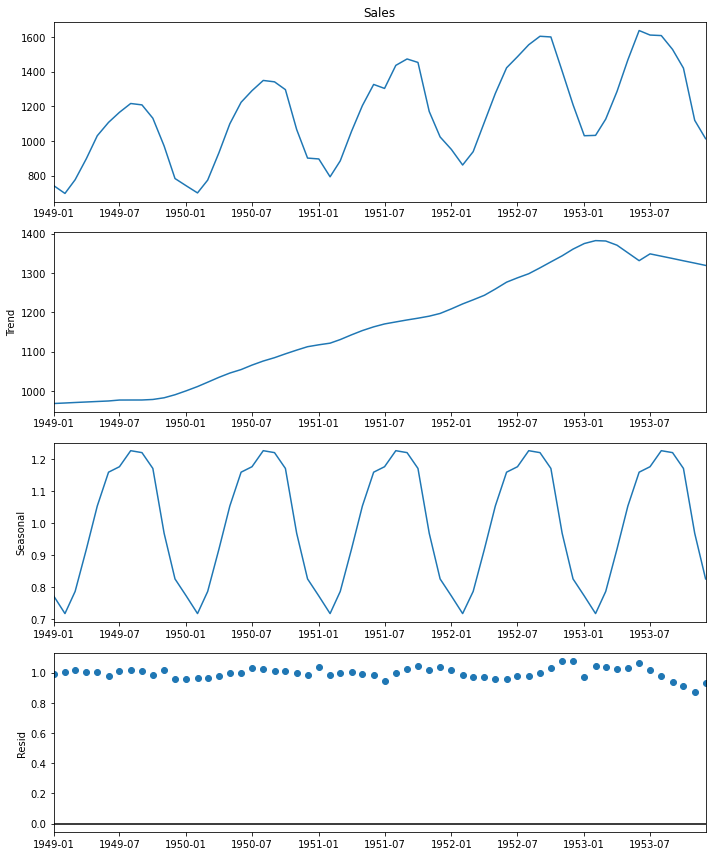

In [28]:
decompose_mul = sm.tsa.seasonal_decompose(sales_count, model = 'multiplicative', extrapolate_trend=4)
decompose_mul.plot()

With Additive Model

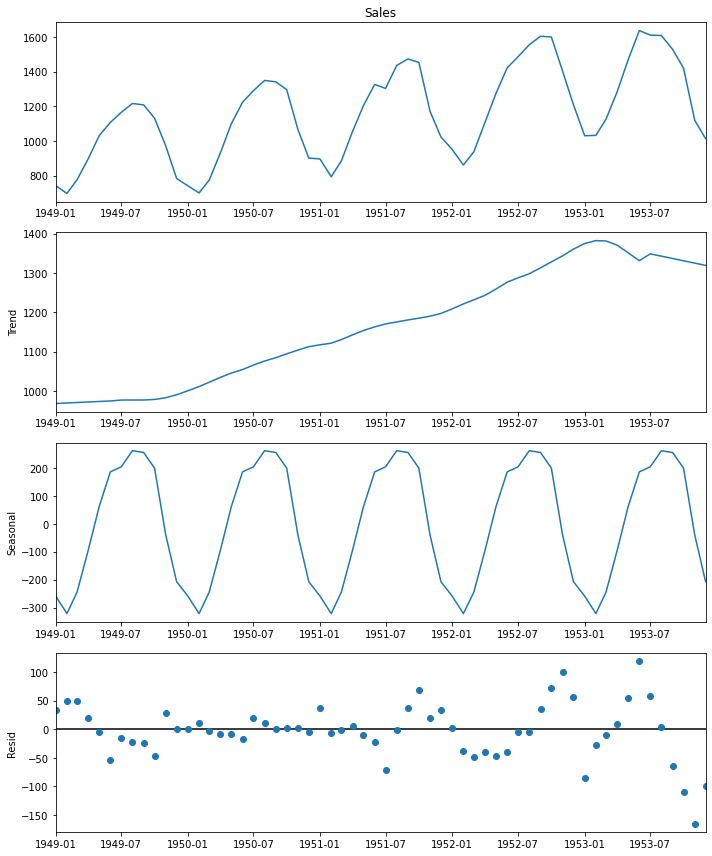

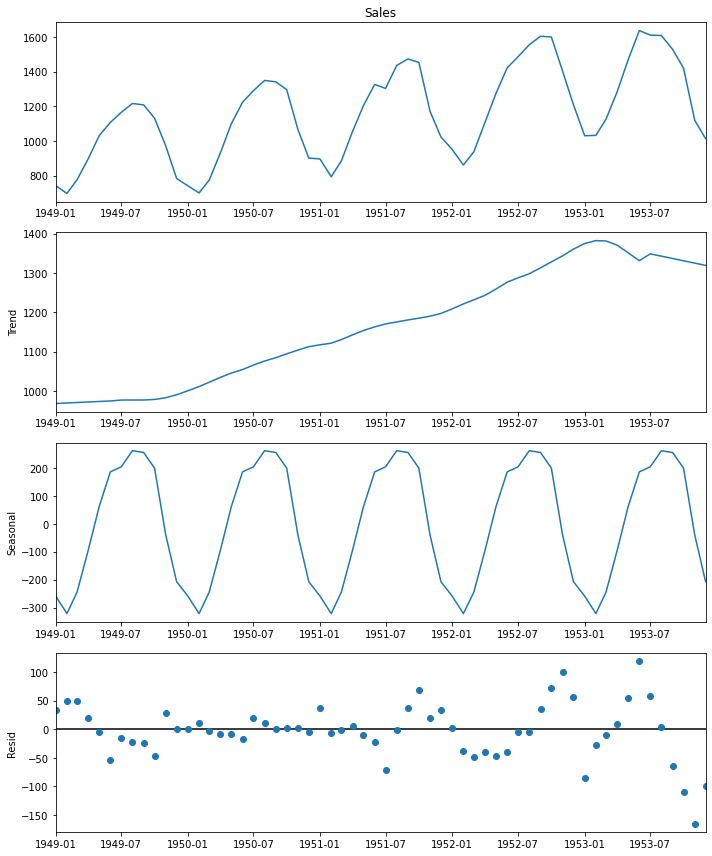

In [29]:
decompose_add = sm.tsa.seasonal_decompose(sales_count, model='additive',extrapolate_trend=4)
decompose_add.plot()

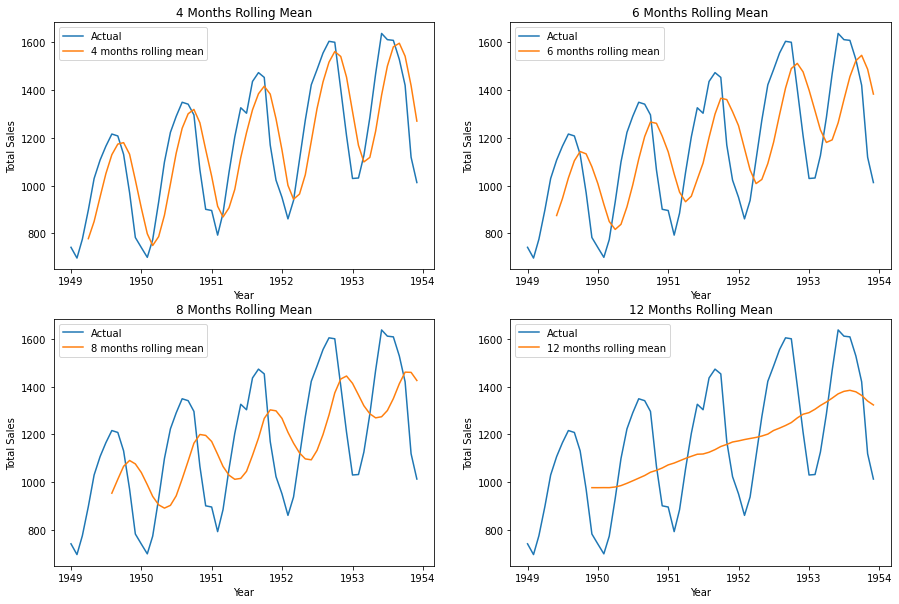

In [30]:
# Charts with moving average
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(data.index,sales_count,label='Actual')
axes[0][0].plot(data.index,sales_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Total Sales')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(data.index,sales_count,label='Actual')
axes[0][1].plot(data.index,sales_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Total Sales')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')



axes[1][0].plot(data.index,sales_count,label='Actual')
axes[1][0].plot(data.index,sales_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Total Sales')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(data.index,sales_count,label='Actual')
axes[1][1].plot(data.index,sales_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Total Sales')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [31]:
# Lets look at the seasonality of our data

In [32]:
monthly = pd.pivot_table(data=data, values='Sales',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
monthly

Year,1949,1950,1951,1952,1953
Month,,,,,
Jan,742,741,896,951,1030
Feb,697,700,793,861,1032
Mar,776,774,885,938,1126
Apr,898,932,1055,1109,1285
May,1030,1099,1204,1274,1468
Jun,1107,1223,1326,1422,1637
Jul,1165,1290,1303,1486,1611
Aug,1216,1349,1436,1555,1608
Sep,1208,1341,1473,1604,1528


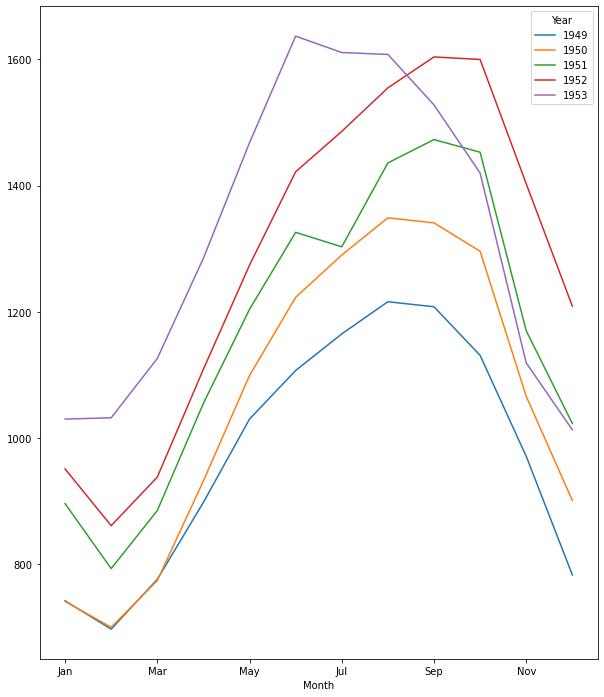

In [33]:
monthly.plot()

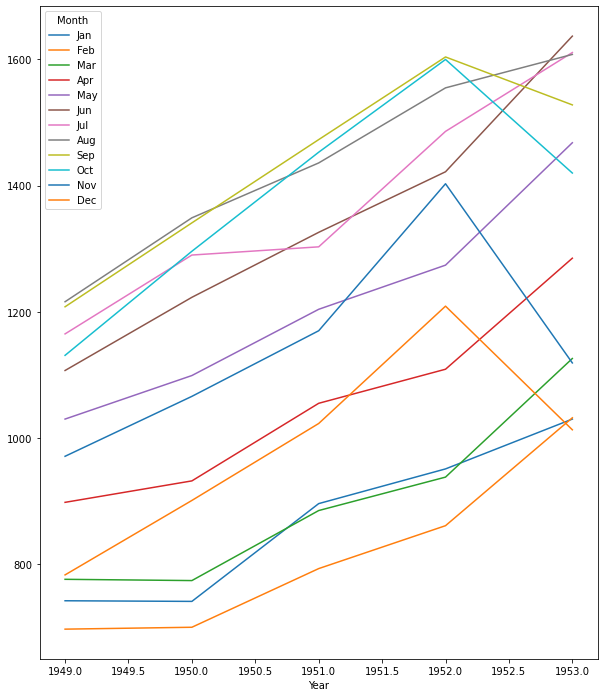

In [34]:
yearly = pd.pivot_table(data=data,values='Sales',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
yearly.plot()

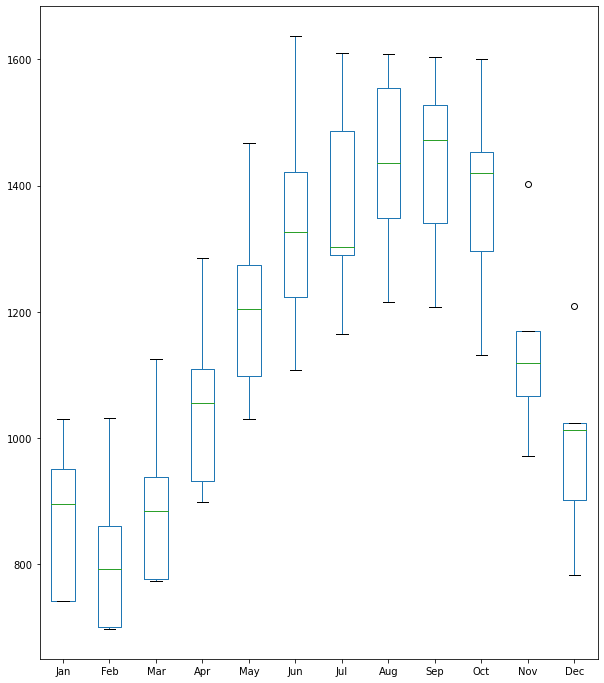

In [35]:
yearly.plot(kind='box')

Lets build ARIMA Model

In [36]:
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [37]:
plastic = backup.copy()

In [38]:
plastic

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


In [41]:
train = plastic.head(54)
test = plastic.tail(6)

In [42]:
train

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


In [44]:
test

,Month,Sales
54,Jul-53,1611
55,Aug-53,1608
56,Sep-53,1528
57,Oct-53,1420
58,Nov-53,1119
59,Dec-53,1013


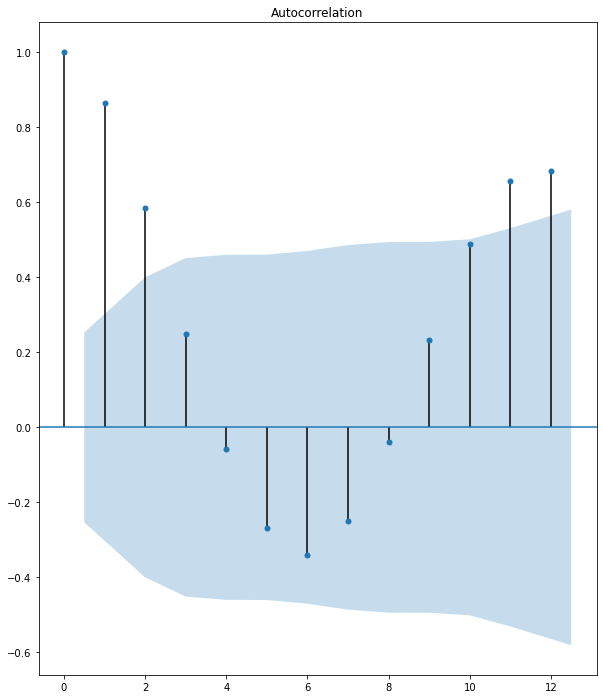

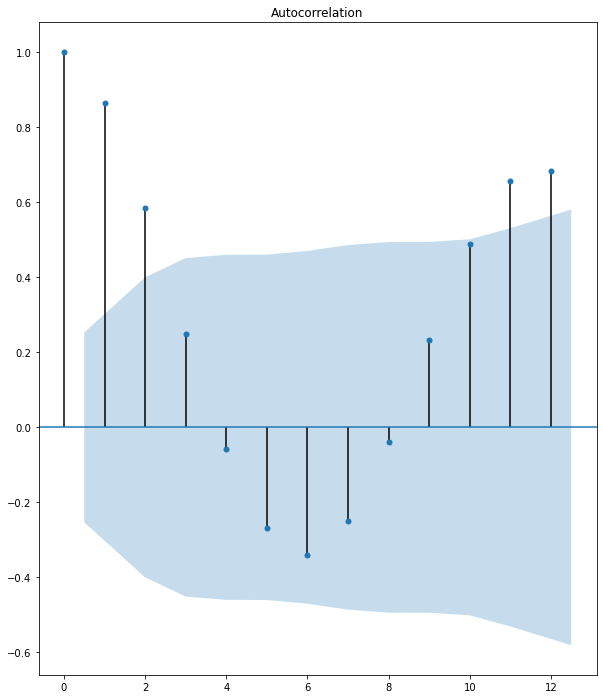

In [46]:
tsa_plots.plot_acf(plastic.Sales, lags=12)

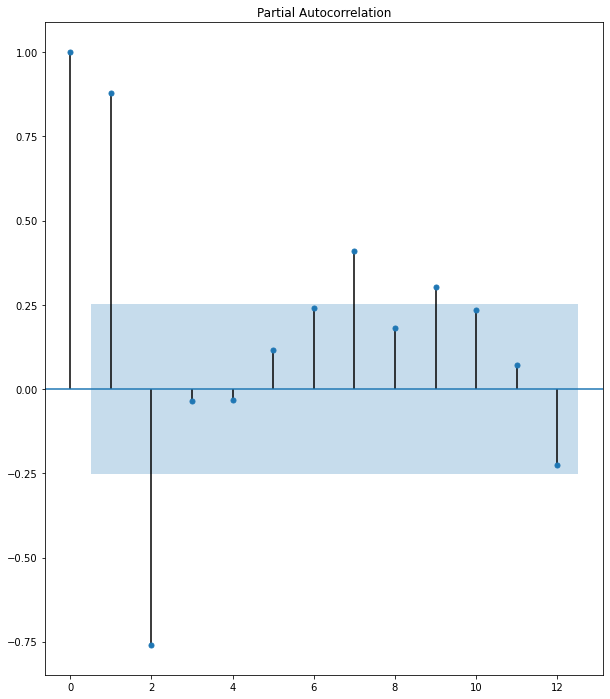

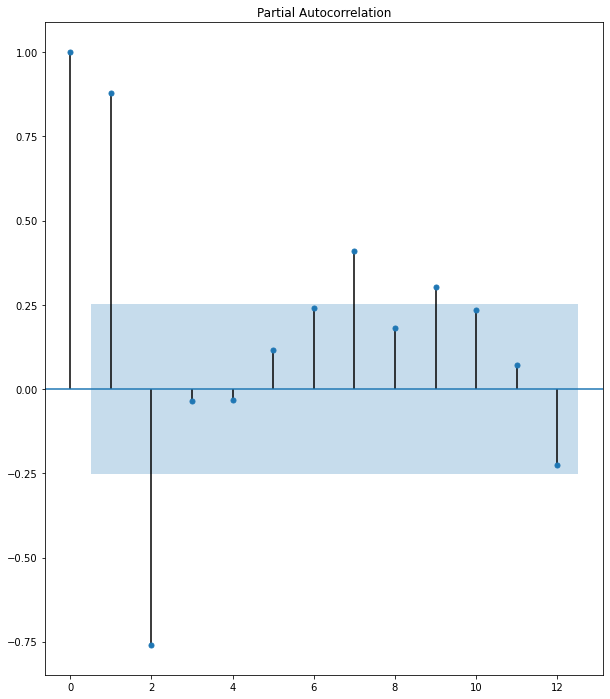

In [47]:
tsa_plots.plot_pacf(plastic.Sales, lags=12)

In [48]:
# Auto ARIMA will automatically discover the optimal order for an ARIMA model

import pmdarima as pm

In [49]:
ar_model = pm.auto_arima(plastic.Sales, start_p=0,start_q=0,
                        max_p=12,max_q=12,
                        m=1,
                        d=None,
                        seasonal=False,
                        start_P=0,trace=True,
                        error_action='warn',stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=741.462, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=709.285, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=717.877, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=739.541, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=708.772, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=702.688, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=700.564, Time=0.18 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=693.123, Time=0.23 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=685.003, Time=0.29 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=683.778, Time=0.40 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=681.092, Time=0.58 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(8,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(9,1,1)(0,0,0)[0] intercept   : AIC=675.387, Time=0.8

In [50]:
# Best parameters = ARIMA(10,1,2)(0,0,0)[0]

model = ARIMA(train.Sales, order=(10,1,2))
res=model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   54
Model:                ARIMA(10, 1, 2)   Log Likelihood                -287.837
Date:                Tue, 11 Jan 2022   AIC                            601.674
Time:                        10:52:45   BIC                            627.288
Sample:                             0   HQIC                           611.524
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7819      0.449      1.743      0.081      -0.097       1.661
ar.L2         -0.8888      0.366     -2.431      0.015      -1.605      -0.172
ar.L3         -0.0839      0.355     -0.236      0.8

C:\Users\jaic208\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [51]:
# Forecast for next 6 months

start_index = len(train)
end_index = start_index + 5
forecast_best = res.predict(start=start_index,end=end_index)
print(forecast_best)

54    1686.888160
55    1690.550858
56    1673.682178
57    1604.050352
58    1444.112048
59    1228.357999
dtype: float64


In [52]:
# Evaluate Forecast

rmse_best = sqrt(mean_squared_error(test.Sales, forecast_best))
print('Test RMSE: %.3f' % rmse_best)

Test RMSE: 191.376


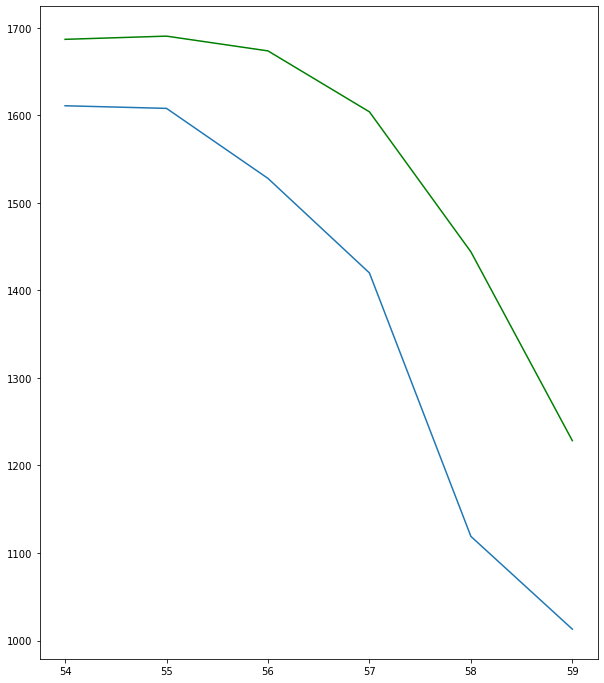

In [53]:
# PLotting forecasted against actual numbers

plt.plot(test.Sales)
plt.plot(forecast_best, color='green')
plt.show()

## Forecasting using Data Driven Approch

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [55]:
# Creating a function which will calculate MAPE

def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

#### Simple Expotential Method

In [57]:
ses_model = SimpleExpSmoothing(train['Sales']).fit()
pred_ses = ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Sales)

22.28718780017861

#### HOLT Method

In [58]:
hw_model = Holt(train['Sales']).fit()
pred_hw_model = hw_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw_model,test.Sales)

C:\Users\jaic208\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


70.27362064010408

#### Holt Winter expoential smoothing with additive seasonality and additive trend

In [59]:
hw_model_add_add = ExponentialSmoothing(train['Sales'], seasonal='add', trend='add',seasonal_periods=6).fit()
pred_hw_model_add_add = hw_model_add_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw_model_add_add, test.Sales)

C:\Users\jaic208\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


28.48248874355672

#### Holt Winter Exponential smoothing with multiplicative seasonality and additive trend

In [60]:
hw_model_mul_add = ExponentialSmoothing(train['Sales'], seasonal='mul',trend='add', seasonal_periods=6).fit()
pred_hw_model_mul_add = hw_model_mul_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw_model_mul_add, test.Sales)

C:\Users\jaic208\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


29.83601426980428

## Forecasting using Model Based Approach

In [61]:
# Preprocessing our data

In [62]:
plastic['t'] = np.arange(len(plastic))

In [63]:
plastic['t_squared'] = plastic['t'] * plastic['t']
plastic['log_sales'] = np.log(plastic['Sales'])
plastic

,Month,Sales,t,t_squared,log_sales
0,Jan-49,742,0,0,6.609349
1,Feb-49,697,1,1,6.546785
2,Mar-49,776,2,4,6.654153
3,Apr-49,898,3,9,6.800170
4,May-49,1030,4,16,6.937314
5,Jun-49,1107,5,25,7.009409
6,Jul-49,1165,6,36,7.060476
7,Aug-49,1216,7,49,7.103322
8,Sep-49,1208,8,64,7.096721
9,Oct-49,1131,9,81,7.030857


In [64]:
plastic['Dates'] = pd.to_datetime(plastic['Month'])
plastic['Dates'] = np.where(plastic['Dates'].dt.year > 2000, plastic['Dates'] - pd.offsets.DateOffset(years=100),plastic['Dates'])
plastic

,Month,Sales,t,t_squared,log_sales,Dates
0,Jan-49,742,0,0,6.609349,1949-01-01
1,Feb-49,697,1,1,6.546785,1949-02-01
2,Mar-49,776,2,4,6.654153,1949-03-01
3,Apr-49,898,3,9,6.800170,1949-04-01
4,May-49,1030,4,16,6.937314,1949-05-01
5,Jun-49,1107,5,25,7.009409,1949-06-01
6,Jul-49,1165,6,36,7.060476,1949-07-01
7,Aug-49,1216,7,49,7.103322,1949-08-01
8,Sep-49,1208,8,64,7.096721,1949-09-01
9,Oct-49,1131,9,81,7.030857,1949-10-01


In [66]:
plastic['Months'] = pd.DatetimeIndex(plastic['Dates']).month
plastic

,Month,Sales,t,t_squared,log_sales,Dates,Months
0,Jan-49,742,0,0,6.609349,1949-01-01,1
1,Feb-49,697,1,1,6.546785,1949-02-01,2
2,Mar-49,776,2,4,6.654153,1949-03-01,3
3,Apr-49,898,3,9,6.800170,1949-04-01,4
4,May-49,1030,4,16,6.937314,1949-05-01,5
5,Jun-49,1107,5,25,7.009409,1949-06-01,6
6,Jul-49,1165,6,36,7.060476,1949-07-01,7
7,Aug-49,1216,7,49,7.103322,1949-08-01,8
8,Sep-49,1208,8,64,7.096721,1949-09-01,9
9,Oct-49,1131,9,81,7.030857,1949-10-01,10


In [67]:
plastic.drop(columns='Dates',inplace=True)
plastic

,Month,Sales,t,t_squared,log_sales,Months
0,Jan-49,742,0,0,6.609349,1
1,Feb-49,697,1,1,6.546785,2
2,Mar-49,776,2,4,6.654153,3
3,Apr-49,898,3,9,6.800170,4
4,May-49,1030,4,16,6.937314,5
5,Jun-49,1107,5,25,7.009409,6
6,Jul-49,1165,6,36,7.060476,7
7,Aug-49,1216,7,49,7.103322,8
8,Sep-49,1208,8,64,7.096721,9
9,Oct-49,1131,9,81,7.030857,10


In [68]:
month_dummies = pd.DataFrame(pd.get_dummies(plastic['Months']))
plastic1 = pd.concat([plastic,month_dummies],axis=1)
plastic1

,Month,Sales,t,t_squared,log_sales,Months,1,2,3,4,5,6,7,8,9,10,11,12
0,Jan-49,742,0,0,6.609349,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-49,697,1,1,6.546785,2,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-49,776,2,4,6.654153,3,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-49,898,3,9,6.800170,4,0,0,0,1,0,0,0,0,0,0,0,0
4,May-49,1030,4,16,6.937314,5,0,0,0,0,1,0,0,0,0,0,0,0
5,Jun-49,1107,5,25,7.009409,6,0,0,0,0,0,1,0,0,0,0,0,0
6,Jul-49,1165,6,36,7.060476,7,0,0,0,0,0,0,1,0,0,0,0,0
7,Aug-49,1216,7,49,7.103322,8,0,0,0,0,0,0,0,1,0,0,0,0
8,Sep-49,1208,8,64,7.096721,9,0,0,0,0,0,0,0,0,1,0,0,0
9,Oct-49,1131,9,81,7.030857,10,0,0,0,0,0,0,0,0,0,1,0,0


In [69]:
plastic1.rename(columns={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
plastic1

,Month,Sales,t,t_squared,log_sales,Months,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-49,742,0,0,6.609349,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-49,697,1,1,6.546785,2,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-49,776,2,4,6.654153,3,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-49,898,3,9,6.800170,4,0,0,0,1,0,0,0,0,0,0,0,0
4,May-49,1030,4,16,6.937314,5,0,0,0,0,1,0,0,0,0,0,0,0
5,Jun-49,1107,5,25,7.009409,6,0,0,0,0,0,1,0,0,0,0,0,0
6,Jul-49,1165,6,36,7.060476,7,0,0,0,0,0,0,1,0,0,0,0,0
7,Aug-49,1216,7,49,7.103322,8,0,0,0,0,0,0,0,1,0,0,0,0
8,Sep-49,1208,8,64,7.096721,9,0,0,0,0,0,0,0,0,1,0,0,0
9,Oct-49,1131,9,81,7.030857,10,0,0,0,0,0,0,0,0,0,1,0,0


In [70]:
# We will now split our data into train and test

In [71]:
train = plastic1.head(54)
test = plastic1.tail(6)
print(train.shape, test.shape)

(54, 18) (6, 18)


### Linear Model

In [74]:
import statsmodels.formula.api as smf
test.set_index(np.arange(1,7))

,Month,Sales,t,t_squared,log_sales,Months,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,Jul-53,1611,54,2916,7.384610,7,0,0,0,0,0,0,1,0,0,0,0,0
2,Aug-53,1608,55,3025,7.382746,8,0,0,0,0,0,0,0,1,0,0,0,0
3,Sep-53,1528,56,3136,7.331715,9,0,0,0,0,0,0,0,0,1,0,0,0
4,Oct-53,1420,57,3249,7.258412,10,0,0,0,0,0,0,0,0,0,1,0,0
5,Nov-53,1119,58,3364,7.020191,11,0,0,0,0,0,0,0,0,0,0,1,0
6,Dec-53,1013,59,3481,6.920672,12,0,0,0,0,0,0,0,0,0,0,0,1


In [75]:
linear_model = smf.ols('Sales ~ t',data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

251.60817152111662

#### Exponential Model

In [76]:
exp = smf.ols('log_sales ~ t', data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

256.84418324336656

#### Quadratic Model

In [77]:
quad = smf.ols('Sales ~ t + t_squared', data=train).fit()
pred_quad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_squared']])))
rmse_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_quad

247.9820883323064

#### Additive Seasonality

In [78]:
add_sea = smf.ols('Sales ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

162.01928897510928

#### Multiplicative Seasonality

In [79]:
mul_sea = smf.ols('log_sales ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test))
rmse_mul_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

166.6160723552401

#### Additive Seasonality Quadratic Trend

In [82]:
add_sea_quad = smf.ols('Sales ~ t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

267.3307744110507

#### Multiplicative Seasonality Linear Trend

In [83]:
mul_add_sea = smf.ols('log_sales ~ t + Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_add_sea = pd.Series(mul_add_sea.predict(test))
rmse_mul_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_add_sea)))**2))
rmse_mul_add_sea

238.03987792453856

In [84]:
data = {'Model':pd.Series(['rmse_linear','rmse_exp','rmse_quad','rmse_add_sea','rmse_mul_sea','rmse_add_sea_quad','rmse_mul_add_sea']),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_mul_sea,rmse_add_sea_quad,rmse_mul_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse

,Model,RMSE_Values
0,rmse_linear,251.608172
1,rmse_exp,256.844183
2,rmse_quad,247.982088
3,rmse_add_sea,162.019289
4,rmse_mul_sea,166.616072
5,rmse_add_sea_quad,267.330774
6,rmse_mul_add_sea,238.039878


Based on all the models, rmse_add_sea seems to the best model

We will build Additive Seasonality model using whole Plastic1 data

In [90]:
model_full = smf.ols('Sales ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=plastic1).fit()

In [91]:
predict_data = pd.read_excel('Plastic_Sales_Forcast.xlsx')

In [92]:
pred_new = pd.Series(model_full.predict(predict_data))
pred_new

0      872.0
1      816.6
2      899.8
3     1055.8
4     1215.0
5     1343.0
6     1371.0
7     1432.8
8     1430.8
9     1380.0
10    1145.8
11     985.8
dtype: float64

In [94]:
predict_data['Forecasted_Numbers'] = pd.Series(pred_new)
predict_data

,Month,t,t_squared,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Forecasted_Numbers
0,1954-01-01,60,3600,1,0,0,0,0,0,0,0,0,0,0,0,872.0
1,1954-02-01,61,3721,0,1,0,0,0,0,0,0,0,0,0,0,816.6
2,1954-03-01,62,3844,0,0,1,0,0,0,0,0,0,0,0,0,899.8
3,1954-04-01,63,3969,0,0,0,1,0,0,0,0,0,0,0,0,1055.8
4,1954-05-01,64,4096,0,0,0,0,1,0,0,0,0,0,0,0,1215.0
5,1954-06-01,65,4225,0,0,0,0,0,1,0,0,0,0,0,0,1343.0
6,1954-07-01,66,4356,0,0,0,0,0,0,1,0,0,0,0,0,1371.0
7,1954-08-01,67,4489,0,0,0,0,0,0,0,1,0,0,0,0,1432.8
8,1954-09-01,68,4624,0,0,0,0,0,0,0,0,1,0,0,0,1430.8
9,1954-10-01,69,4761,0,0,0,0,0,0,0,0,0,1,0,0,1380.0


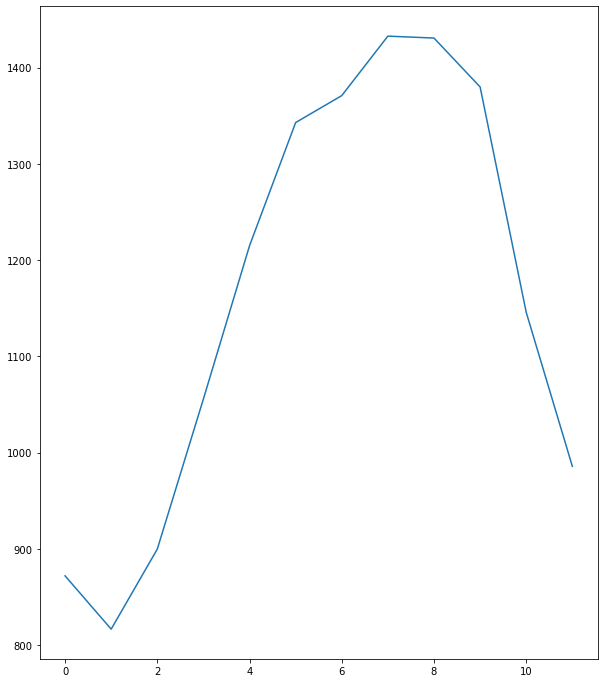

In [95]:
predict_data['Forecasted_Numbers'].plot()

#### Auto_Regression_Model

In [97]:
full_res = plastic1.Sales - model_full.predict(plastic1)
full_res

0    -130.0
1    -119.6
2    -123.8
3    -157.8
4    -185.0
5    -236.0
6    -206.0
7    -216.8
8    -222.8
9    -249.0
10   -174.8
11   -202.8
12   -131.0
13   -116.6
14   -125.8
15   -123.8
16   -116.0
17   -120.0
18    -81.0
19    -83.8
20    -89.8
21    -84.0
22    -79.8
23    -84.8
24     24.0
25    -23.6
26    -14.8
27     -0.8
28    -11.0
29    -17.0
30    -68.0
31      3.2
32     42.2
33     73.0
34     24.2
35     37.2
36     79.0
37     44.4
38     38.2
39     53.2
40     59.0
41     79.0
42    115.0
43    122.2
44    173.2
45    220.0
46    257.2
47    223.2
48    158.0
49    215.4
50    226.2
51    229.2
52    253.0
53    294.0
54    240.0
55    175.2
56     97.2
57     40.0
58    -26.8
59     27.2
dtype: float64

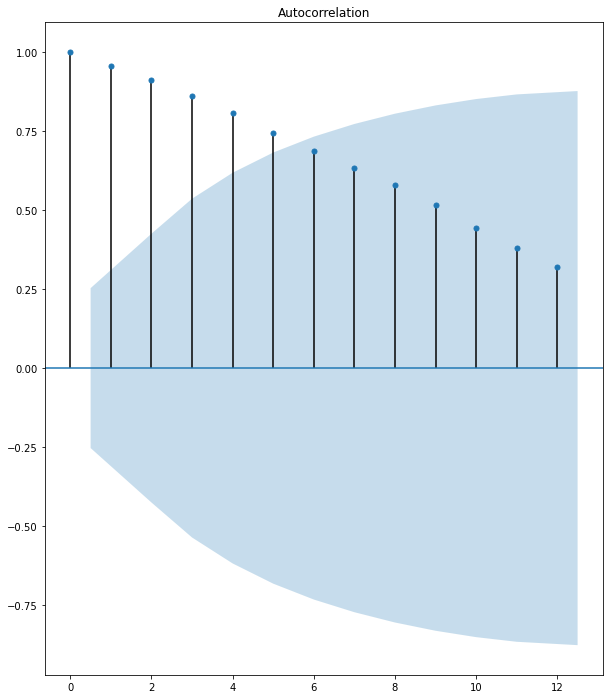

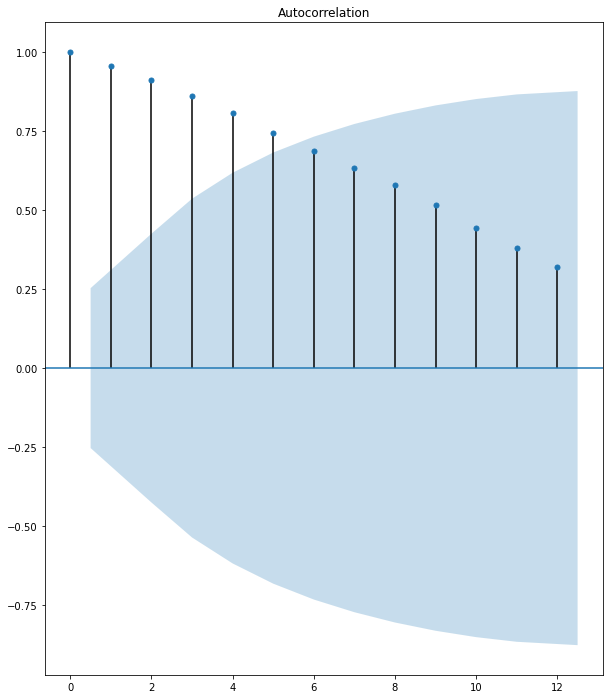

In [99]:
# ACF Plot on residuals

tsa_plots.plot_acf(full_res, lags=12)

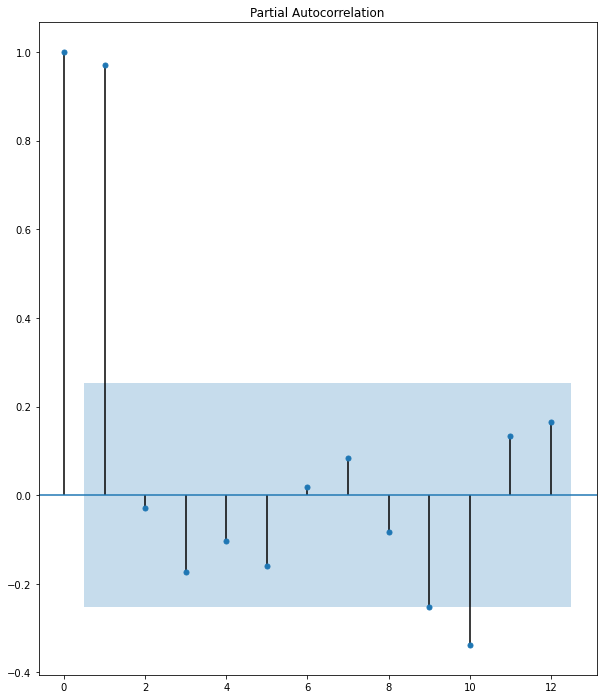

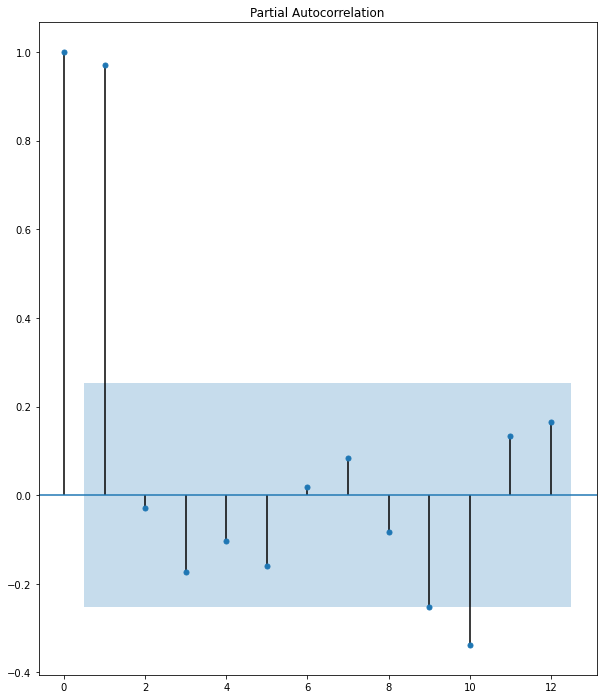

In [100]:
tsa_plots.plot_pacf(full_res, lags=12)

In [101]:
# AR model
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags=[1])
# model_ar = AutoReg(Train_res, lags=12)
model_fit = model_ar.fit()

In [102]:
print('Coefficients: %s' % model_fit.params)

Coefficients: intercept    2.644313
y.L1         0.956414
dtype: float64


In [103]:
pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(predict_data)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)

In [104]:
# The Final Predictions using ASQT and AR(1) Model
final_pred = pred_new + pred_res
final_pred

0      900.658786
1      846.653990
2      931.188384
3     1088.464617
4     1248.885225
5     1378.052632
6     1407.169157
7     1470.037018
8     1469.058335
9     1419.235138
10    1185.969366
11    1026.862875
dtype: float64

In [105]:
predict_data['Forecasted_Numbers_With_Residuals'] = pd.Series(final_pred)
predict_data

,Month,t,t_squared,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Forecasted_Numbers,Forecasted_Numbers_With_Residuals
0,1954-01-01,60,3600,1,0,0,0,0,0,0,0,0,0,0,0,872.0,900.658786
1,1954-02-01,61,3721,0,1,0,0,0,0,0,0,0,0,0,0,816.6,846.653990
2,1954-03-01,62,3844,0,0,1,0,0,0,0,0,0,0,0,0,899.8,931.188384
3,1954-04-01,63,3969,0,0,0,1,0,0,0,0,0,0,0,0,1055.8,1088.464617
4,1954-05-01,64,4096,0,0,0,0,1,0,0,0,0,0,0,0,1215.0,1248.885225
5,1954-06-01,65,4225,0,0,0,0,0,1,0,0,0,0,0,0,1343.0,1378.052632
6,1954-07-01,66,4356,0,0,0,0,0,0,1,0,0,0,0,0,1371.0,1407.169157
7,1954-08-01,67,4489,0,0,0,0,0,0,0,1,0,0,0,0,1432.8,1470.037018
8,1954-09-01,68,4624,0,0,0,0,0,0,0,0,1,0,0,0,1430.8,1469.058335
9,1954-10-01,69,4761,0,0,0,0,0,0,0,0,0,1,0,0,1380.0,1419.235138


We have sucessfully forecasted Sales for Plastic company

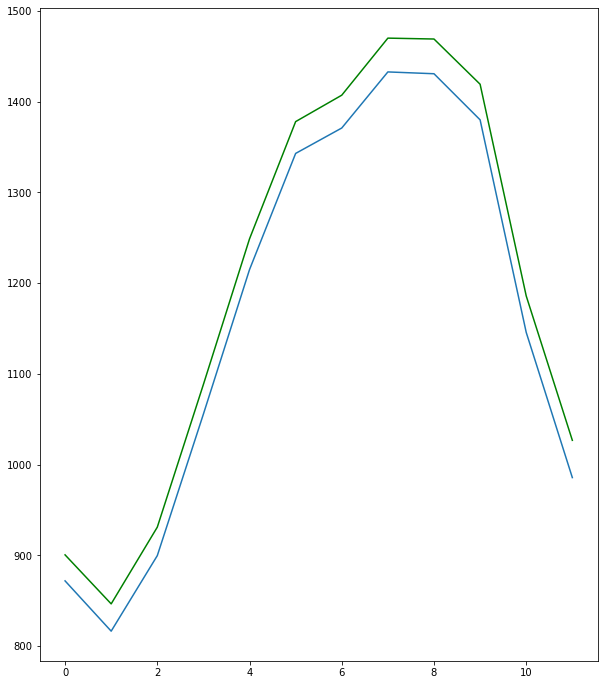

In [107]:
plt.plot(predict_data['Forecasted_Numbers'])
plt.plot(predict_data['Forecasted_Numbers_With_Residuals'],color='green')